In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import interactive
interactive(True)
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
sns.set()
import statsmodels.api as sm
from scipy import interpolate
from scipy import stats
from scipy import integrate
from scipy.optimize import curve_fit
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

<h1>Calcuations and Figures for Flume Experiments

<h2>1a. Fitting Data to an Exponential Model, Calculating $k_{t}$</h2>

In [2]:
#exp_model_func and lin_model_func were only used for graphing purposes. to fit an exponential model to the data
#stats.linregress (shown in cell below) was used on the log of the mass volume concentration data points.

def exp_model_func(t, a, k):
    return a*np.exp(k*t)

def lin_model_func(t, a, k):
    return a + k*t

def reynolds_number(freq): #frequency of flume, at either 10, 20, or 30 Hz
    velocity = 0.00196*freq + 0.00081
    return round((velocity*0.003175)/(9.509e-7), 3), velocity

def frontal_area(density):
    return round((density*1.2*0.003175*0.4)/(0.4*1.2), 3)

In [3]:
#plotting invidual experiment runs and the corresponding exponential decay curve

def exp_model_graph(csv_name, exp_settings, plot = 0, fit = 0):
    pump_data = pd.read_csv(csv_name)
    settings = pd.read_csv(exp_settings)
    exp_density = settings[settings['CSV Name'] == csv_name].iloc[0,2]    
    exp_velocity = settings[settings['CSV Name'] == csv_name].iloc[0,3]
    t = pump_data.iloc[:,0]
    y = pump_data.iloc[:,11]
    slope, intercept, r_value, p_value, std_err = stats.linregress(t, np.log(y))
    if plot == 1:
        fig = plt.figure(figsize=(10,7));
        ax = sns.scatterplot(t, y, hue='Location', data=pump_data, s=80);
        plt.title(f"Frontal Area: {frontal_area(exp_density)} $m^{2}/m^{3}$, $Re_{'c'}$: {reynolds_number(exp_velocity)[0]}");
        plt.xlabel('Time (s)');
        plt.ylabel('Mass Volume Concentration (ppm)');
        plt.ylim(0, max(y)+5);
        plt.xlim(0, 6000);
        if fit == 1:
            ax.plot(t, exp_model_func(t, np.exp(intercept), slope))
    elif fit == 1:
        fig = plt.figure(figsize=(10,7));
        ax = sns.lineplot(t, exp_model_func(t,np.exp(intercept), slope));
        plt.title(f"Frontal Area: {frontal_area(exp_density)} $m^{2}/m^{3}$,  $Re_{'c'}$: {reynolds_number(exp_velocity)[0]}");
        plt.xlabel('Time (s)');
        plt.ylabel('Mass Volume Concentration (ppm)');
        plt.ylim(0, max(y)+5);
        plt.xlim(0, 6000);
    return slope, np.exp(intercept), t, r_value

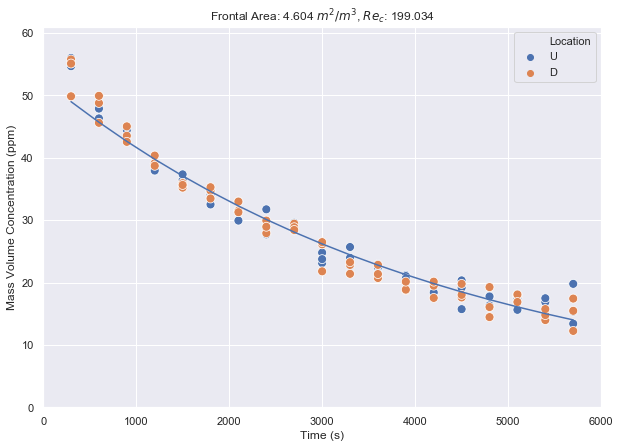

In [4]:
#example using functions defined above
slope, intercept, t, r = exp_model_graph('111518pumpdata.csv','flumeexperimentsettings.csv', plot = 1, fit = 1)

Above is an example of the data from one of our experiment runs and the fitted exponential decay curve. This particular experiment is a high dowel density (1450) and high velocity (30 Hz, or 0.06 m/s) run; the slope is 2.31e-4 and the r-squared is around 96%. This slope was calculated for every experiment run, and used as k (total) in subsequent calculations.

<h2>1b. Slopes of Flume Runs Based on Dowel Density and Velocity

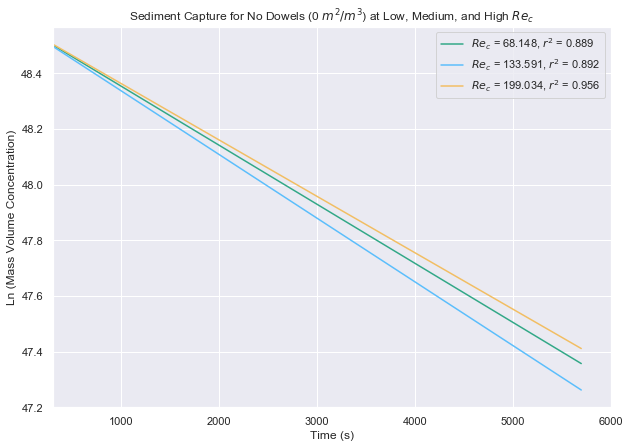

In [5]:
#Control Runs Plots
control_names = ['072919pumpdata.csv','080219pumpdata.csv','032119pumpdata.csv']
control_r = []
control_slopes = []
control_const = []
plt.figure(0, figsize=(10,7));
for i in control_names:
    slope, const, curr_t, curr_r = exp_model_graph(i, 'flumeexperimentsettings.csv', plot = 0, fit = 0)
    control_r.append(curr_r**2)
    control_slopes.append(slope)
    control_const.append(const)
color = ['#32a887','#5bbefc','#f2be63']
counter = 0
for i in control_slopes:
    plt.plot(curr_t, lin_model_func(curr_t, np.mean(control_const), i), color=color[counter])
    counter += 1
plt.xlabel('Time (s)');
plt.ylabel('Ln (Mass Volume Concentration)');
plt.legend([f"$Re_{'c'}$ = {reynolds_number(10)[0]}, $r^{2}$ = {round(control_r[0],3)}", f"$Re_{'c'}$ = {reynolds_number(20)[0]}, $r^{2}$ = {round(control_r[1],3)}", f"$Re_{'c'}$ = {reynolds_number(30)[0]}, $r^{2}$ = {round(control_r[2],3)}"]);
plt.xlim([300,6000]);
plt.title('Sediment Capture for No Dowels (0 $m^{2}/m^{3}$) at Low, Medium, and High $Re_{c}$');

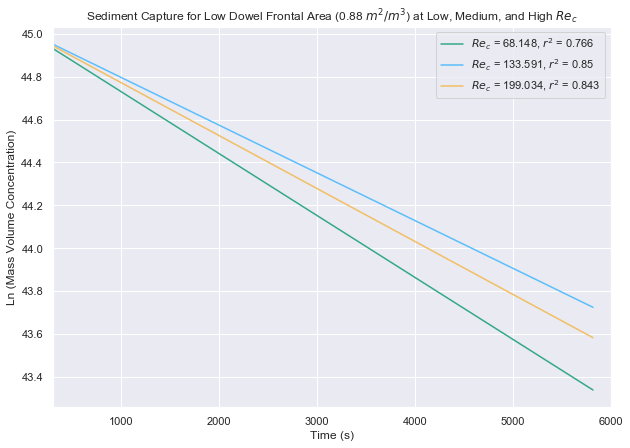

In [6]:
#Low Density Runs Plots
low_dens_names = ['090519pumpdata.csv','092619pumpdata.csv','050619pumpdata.csv']
low_r = []
low_slopes = []
low_const = []
plt.figure(0, figsize=(10,7));
for i in low_dens_names:
    slope, const, curr_t, curr_r = exp_model_graph(i, 'flumeexperimentsettings.csv', plot = 0, fit = 0)
    low_r.append(curr_r**2)
    low_slopes.append(slope)
    low_const.append(const)
color = ['#32a887','#5bbefc','#f2be63']
counter = 0
for i in low_slopes:
    plt.plot(curr_t, lin_model_func(curr_t, np.mean(low_const), i), color=color[counter])
    counter += 1
plt.xlabel('Time (s)');
plt.ylabel('Ln (Mass Volume Concentration)');
plt.legend([f"$Re_{'c'}$ = {reynolds_number(10)[0]}, $r^{2}$ = {round(low_r[0],3)}", f"$Re_{'c'}$ = {reynolds_number(20)[0]}, $r^{2}$ = {round(low_r[1],3)}", f"$Re_{'c'}$ = {reynolds_number(30)[0]}, $r^{2}$ = {round(low_r[2],3)}"]);
plt.xlim([300,6000]);
plt.title('Sediment Capture for Low Dowel Frontal Area (0.88 $m^{2}/m^{3}$) at Low, Medium, and High $Re_{c}$');

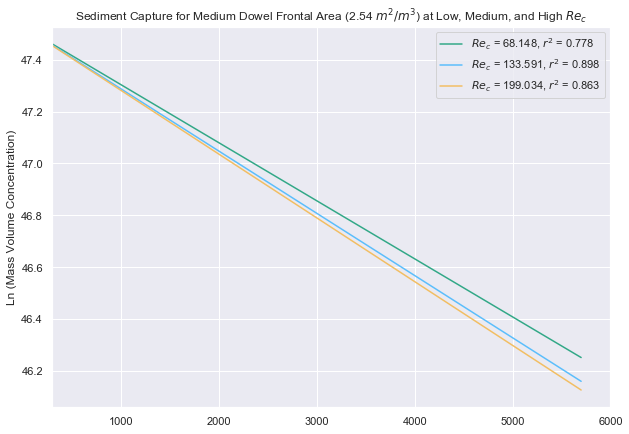

In [7]:
#Med Density Runs Plots
med_dens_names = ['102919pumpdata.csv','021120pumpdata.csv','061219pumpdata.csv']
med_r = []
med_slopes = []
med_const = []
plt.figure(0, figsize=(10,7));
for i in med_dens_names:
    slope, const, curr_t, curr_r = exp_model_graph(i, 'flumeexperimentsettings.csv', plot = 0, fit = 0)
    med_r.append(curr_r**2)
    med_slopes.append(slope)
    med_const.append(const)
color = ['#32a887','#5bbefc','#f2be63']
counter = 0
for i in med_slopes:
    plt.plot(curr_t, lin_model_func(curr_t, np.mean(med_const), i), color=color[counter])
    counter += 1
plt.ylabel('Ln (Mass Volume Concentration)');
plt.legend([f"$Re_{'c'}$ = {reynolds_number(10)[0]}, $r^{2}$ = {round(med_r[0],3)}", f"$Re_{'c'}$ = {reynolds_number(20)[0]}, $r^{2}$ = {round(med_r[1],3)}", f"$Re_{'c'}$ = {reynolds_number(30)[0]}, $r^{2}$ = {round(med_r[2],3)}"]);
plt.xlim([300,6000]);
plt.title('Sediment Capture for Medium Dowel Frontal Area (2.54 $m^{2}/m^{3}$) at Low, Medium, and High $Re_{c}$');

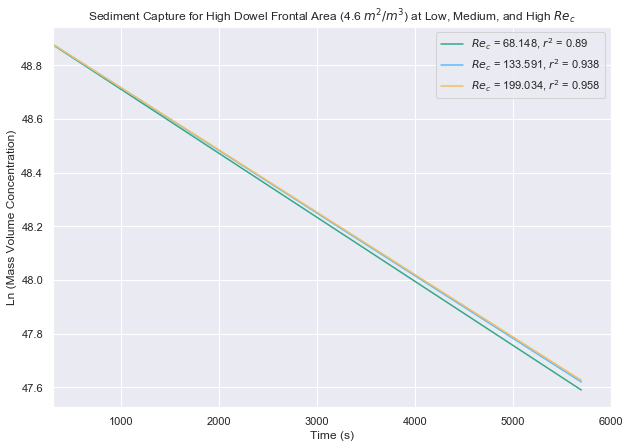

In [8]:
#High Density Runs Plots
high_dens_names = ['030320pumpdata.csv','031320pumpdata.csv','111518pumpdata.csv']
high_r = []
high_slopes = []
high_const = []
plt.figure(0, figsize=(10,7));
for i in high_dens_names:
    slope, const, curr_t, curr_r = exp_model_graph(i, 'flumeexperimentsettings.csv', plot = 0, fit = 0)
    high_r.append(curr_r**2)
    high_slopes.append(slope)
    high_const.append(const)
color = ['#32a887','#5bbefc','#f2be63']
counter = 0
for i in high_slopes:
    plt.plot(curr_t, lin_model_func(curr_t, np.mean(high_const), i), color=color[counter])
    counter += 1
plt.xlabel('Time (s)');
plt.ylabel('Ln (Mass Volume Concentration)');
plt.legend([f"$Re_{'c'}$ = {reynolds_number(10)[0]}, $r^{2}$ = {round(high_r[0],3)}", f"$Re_{'c'}$ = {reynolds_number(20)[0]}, $r^{2}$ = {round(high_r[1],3)}", f"$Re_{'c'}$ = {reynolds_number(30)[0]}, $r^{2}$ = {round(high_r[2],3)}"]);
plt.xlim([300,6000]);
plt.title('Sediment Capture for High Dowel Frontal Area (4.6 $m^{2}/m^{3}$) at Low, Medium, and High $Re_{c}$');

In order to directly compare just the slopes, I averaged the starting concentration for each set of dowel treatments (control, low, medium, high) and graphed them starting from this same average value. The low dowel density treatment seems to have the most variability in terms of k<sub>t</sub>, whereas the k<sub>t</sub> for high dowel density treatment all seem to be very similar.  

<h2>2. Calculating Particle Capture Rate & Estimated Collector Efficiency</h2>

In [9]:
#calculating mass of sediment settling within the test section
def test_section_settling(csv_name):
    csv_name = csv_name[0:6] + 'sedtrap.csv' 
    sample = pd.read_csv(csv_name)
    sample = sample[0:9]
    indices = list(sample[sample['Sediment'].notnull()].index) #these next two lines identify at which
    #indices values for the sediment trap are missing and exclude these values at these 
    #indices from further calculations
    sample = sample.iloc[indices,:]
    sediment_settled = (np.mean(sample['Sediment']*0.001)*1.95*0.6)/(np.pi*0.0127**2) 
    #this scales the sediment settled by as well as by the area of the just the test section to get the amount of 
    #sediment settled within the section
    return sediment_settled

In [10]:
#function for calculating k_background (basically k_c but for control runs ONLY!!)
def k_bg(m_s, k_t, u):
    numerator = m_s*k_t
    denominator = 200*(1-np.exp(-k_t*6000))
    k_s = numerator/denominator
    k_bg = k_t - k_s
    return k_s, k_bg

In [11]:
# calculating k_background for each control run (except 10/19/18 run, this run had no sediment traps)
control_runs = pd.read_csv('flumeexperimentsettings.csv') 
control_runs = control_runs.drop([0,5,11,12]) #drop anomolous run (5), run with no sediment traps (0) and 
#extra-low runs (11,12)
control_runs = control_runs[control_runs['Density'] == 0] #getting only control runs
m_s_array_control = []
k_t_array_control = []
k_bg_array_control = []
k_s_array_control = []
re_c_array_control = []
frontal_area_array_control = []
for i in range(len(control_runs)):
    curr_name = control_runs['CSV Name'].iloc[i] #getting name of current CSV file in loop
    current_frequency = control_runs['Velocity'].iloc[i] #frequency of current file 
    current_stem_density = control_runs['Density'].iloc[i]  #stem density of current file
    slope, intercept, t, r = exp_model_graph(curr_name, 'flumeexperimentsettings.csv') #fitting exp model to 
    #current file
    k_t = -1*slope 
    m_s = test_section_settling(curr_name)
    curr_k_s = k_bg(m_s, k_t, reynolds_number(current_frequency)[1])[0] #calculating k_s 
    curr_k_bg = k_bg(m_s, k_t, reynolds_number(current_frequency)[1])[1] #calculating k_bg (functions defined above)
    
    #below: appending all arrays with data calculated in the lines above
    re_c_array_control.append(reynolds_number(current_frequency)[0])
    frontal_area_array_control.append(frontal_area(current_stem_density))
    k_t_array_control.append(k_t)
    m_s_array_control.append(m_s)
    k_s_array_control.append(curr_k_s)
    k_bg_array_control.append(curr_k_bg)
    
control_runs['Re_c'] = re_c_array_control
control_runs['Frontal Area'] = frontal_area_array_control
control_runs['k_t'] = k_t_array_control
control_runs['m_s'] = m_s_array_control
control_runs['k_s'] = k_s_array_control
control_runs['k_bg'] = k_bg_array_control
control_runs

,Date,CSV Name,Density,Velocity,Biofouled,Re_c,Frontal Area,k_t,m_s,k_s,k_bg
4,3212019,032119pumpdata.csv,0,30,0,199.034,0.0,0.000203,28.226542,0.000041,0.000162
9,7292019,072919pumpdata.csv,0,10,0,68.148,0.0,0.000212,37.472903,0.000055,0.000157
10,8022019,080219pumpdata.csv,0,20,0,133.591,0.0,0.000229,18.718492,0.000029,0.000200


In [12]:
k_bg_list = [control_runs.iloc[1]['k_bg'], control_runs.iloc[2]['k_bg'], control_runs.iloc[0]['k_bg']] 
#creating a list I can parse through later of k_bg values in the order of k_bg for 10 Hz, 20 Hz, 30 Hz

In [13]:
def coll_efficiency(m_s, k_t, freq, stem_density):
    stem_diameter = 0.003175
    #calculating k_settling in the next three lines
    numerator = m_s*k_t
    denominator = 200*(1-np.exp(-k_t*6000))
    k_s = numerator/denominator
    
    #calculating k_collected in the next three lines, and scaling k_c by ratio of travel times through entire flume
    #versus travel times through vegetation
    vol_flume = 2.43
    vol_test_section = 1.95*0.6*0.4
    volume_ratio = vol_flume/vol_test_section
    k_c = (k_t - k_s) * volume_ratio
    #if-else statement based on which frequency current experiment was run at
    if freq == 10:
        k_c = k_c - k_bg_list[0]
    elif freq == 20:
        k_c = k_c - k_bg_list[1]
    elif freq == 30:
        k_c = k_c - k_bg_list[2]
        
    #calculating n'
    velocity = reynolds_number(freq)[1] #the reynolds_number function outputs both the Re and velocity in a tuple
    #the [1] index just gets only the velocity from the tuple
    collector_efficiency = k_c/(velocity * stem_diameter * stem_density)
    return k_s, k_c, collector_efficiency

<h2>Equation Explanation

The equation I used to calculate $k_{s}$ is

<div>
<img src="k_s_equation.png" width="225"/>
</div>

Using Jordan's method of including a term called "k background" (rate of background settling), $m_{s}$ is calculated by scaling average sediment mass settled per sediment trap area ($g/m^{2}$) by the area of just the test section ($1.95\ m * 0.6\ m$). 

$k_{bg}$ is the difference between the total decay rate ($k_{t}$) and the settling rate ($k_{s}$) for runs with no dowels. $k_{bg}$ was calculated for the 3 control runs at each flume frequency in our parameter space (10, 20 and 30 Hz).

$k_{c}$ is the difference between the total decay rate $k_{t}$ scaled by the ratio between the volume of the entire flume and the volume of the vegetated area. $k_{bg}$ is then subtracted from $k_{c}$, as shown in the equation below. The cell below this explanation section loads a csv file of meta-data on all the experiments done and the experiment settings used (stem density, flume frequency, whether the vegetation was biofouled or not). 

The cell below then loops through this entire table, calculating $m_{s}$, $k_{t}$, $k_{s}$, and $k_{c}$ for each experiment. For each experiment, the code finds the frequency at which the experiment was run; $k_{c}$ is initially calculated as the difference between the specific $k_{t}$ and $k_{s}$ of each experiment multiplied by the volume ratio. The final $k_{c}$ that is eventually used in the effective collector efficiency equation is calculated by subtracting the corresponding $k_{bg}$ (corresponding based on the flume frequency) from the initial $k_{c}$ (as descbribed in the previous sentence). The equation below was used to find $k_{c}$ for each experiment.

<div>
<img src="k_c_with_k_bg.png" width="300"/>
</div>

Effective collector efficiency was then calculated from $k_{c}$, using the equation as described in the Fauria paper (where $d_{c}$ is stem diameter, $I_{c}$ is stem density, and u is flow velocity) as: 

<div>
<img src="efficiency_eqn.png" width="125"/>
</div>

All of these calculations are done in the following cell. 

In [14]:
#this section calculates k_t, m_s, k_s, k_c, and n' for all experiments, using the k_bg calculated in the 
#previous cells
all_experiments = pd.read_csv('flumeexperimentsettings.csv')
all_experiments = all_experiments.drop([5, 11, 12])
m_s_array_all = []
k_t_array_all = []
re_c_array_all = []
frontal_area_array_all = []
k_s_array_all = []
k_c_array_all = []
efficiencies_all = []
for i in range(len(all_experiments)):    
    curr_name = all_experiments['CSV Name'].iloc[i] #reading in file
    slope, intercept, t, r = exp_model_graph(curr_name, 'flumeexperimentsettings.csv') #calculating k_t
    k_t = -1*slope 
    current_frequency = all_experiments['Velocity'].iloc[i]
    current_stem_density = all_experiments['Density'].iloc[i]
    m_s = test_section_settling(curr_name)
    #below: using collector efficiency fnc. defined in cell above to calculate k_s, k_c, and n'
    #k_bg is subtracted within the coll_efficiency function in above cell
    k_s, k_c, efficiency = coll_efficiency(m_s, k_t, current_frequency, current_stem_density)
    
    #appending all data of current file in loop to its own array
    re_c_array_all.append(reynolds_number(current_frequency)[0])
    frontal_area_array_all.append(frontal_area(current_stem_density))
    k_t_array_all.append(k_t)
    m_s_array_all.append(m_s)
    k_s_array_all.append(k_s)
    k_c_array_all.append(k_c)
    efficiencies_all.append(efficiency*100) #this efficiency is in a percentage!!

#adding new columns of array created in above for loop to entire data table
all_experiments['Re_c'] = re_c_array_all
all_experiments['Frontal Area'] = frontal_area_array_all
all_experiments['k_t'] = k_t_array_all
all_experiments['m_s'] = m_s_array_all
all_experiments['k_s'] = k_s_array_all
all_experiments['k_c'] = k_c_array_all
all_experiments['ECE %'] = efficiencies_all

In [15]:
all_experiments

,Date,CSV Name,Density,Velocity,Biofouled,Re_c,Frontal Area,k_t,m_s,k_s,k_c,ECE %
0,10192018,101918pumpdata.csv,0,30,0,199.034,0.000,0.000165,28.226542,0.000037,0.000504,inf
1,11152018,111518pumpdata.csv,1450,30,0,199.034,4.604,0.000232,15.692708,0.000024,0.000916,0.333913
2,12042018,120418pumpdata.csv,1450,30,1,199.034,4.604,0.000296,17.194536,0.000031,0.001215,0.442807
3,1312019,013119pumpdata.csv,1450,30,1,199.034,4.604,0.000435,15.279970,0.000036,0.001909,0.695534
4,3212019,032119pumpdata.csv,0,30,0,199.034,0.000,0.000203,28.226542,0.000041,0.000679,inf
6,5062019,050619pumpdata.csv,278,30,0,199.034,0.883,0.000247,22.836253,0.000036,0.000929,1.766311
7,6122019,061219pumpdata.csv,800,30,0,199.034,2.540,0.000246,21.638125,0.000034,0.000934,0.617089
8,7012019,070119pumpdata.csv,800,30,1,199.034,2.540,0.000274,16.147778,0.000027,0.001119,0.738939
9,7292019,072919pumpdata.csv,0,10,0,68.148,0.000,0.000212,37.472903,0.000055,0.000658,inf
10,8022019,080219pumpdata.csv,0,20,0,133.591,0.000,0.000229,18.718492,0.000029,0.000839,inf


In [16]:
#run this cell to output a csv file of the parameters and calculated variables
all_experiments.to_csv(r'ECE_with_k_bg.csv', index = False)

In [17]:
all_experiemnts_copy = all_experiments.rename(columns = {'Re_c': '$Re_{c}$','m_s': '$m_{s} (g)$', 'k_t': '$k_{t}$', 'k_s': '$k_{s}$', 'k_c': '$k_{c}$'})
all_experiemnts_copy

,Date,CSV Name,Density,Velocity,Biofouled,$Re_{c}$,Frontal Area,$k_{t}$,$m_{s} (g)$,$k_{s}$,$k_{c}$,ECE %
0,10192018,101918pumpdata.csv,0,30,0,199.034,0.000,0.000165,28.226542,0.000037,0.000504,inf
1,11152018,111518pumpdata.csv,1450,30,0,199.034,4.604,0.000232,15.692708,0.000024,0.000916,0.333913
2,12042018,120418pumpdata.csv,1450,30,1,199.034,4.604,0.000296,17.194536,0.000031,0.001215,0.442807
3,1312019,013119pumpdata.csv,1450,30,1,199.034,4.604,0.000435,15.279970,0.000036,0.001909,0.695534
4,3212019,032119pumpdata.csv,0,30,0,199.034,0.000,0.000203,28.226542,0.000041,0.000679,inf
6,5062019,050619pumpdata.csv,278,30,0,199.034,0.883,0.000247,22.836253,0.000036,0.000929,1.766311
7,6122019,061219pumpdata.csv,800,30,0,199.034,2.540,0.000246,21.638125,0.000034,0.000934,0.617089
8,7012019,070119pumpdata.csv,800,30,1,199.034,2.540,0.000274,16.147778,0.000027,0.001119,0.738939
9,7292019,072919pumpdata.csv,0,10,0,68.148,0.000,0.000212,37.472903,0.000055,0.000658,inf
10,8022019,080219pumpdata.csv,0,20,0,133.591,0.000,0.000229,18.718492,0.000029,0.000839,inf


<h2>Plotting</h2>

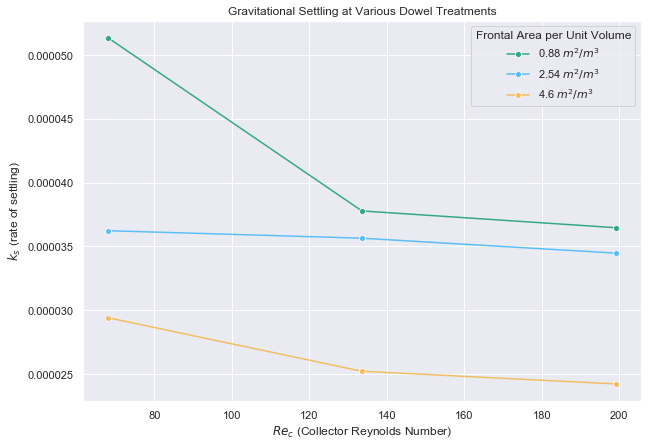

In [18]:
ks_low = all_experiments[(all_experiments['Frontal Area']==0.883) & (all_experiments['Biofouled']==0)].sort_values('Velocity')
ks_med = all_experiments[(all_experiments['Frontal Area']==2.540) & (all_experiments['Biofouled']==0)].sort_values('Velocity')
ks_high = all_experiments[(all_experiments['Frontal Area']==4.604) & (all_experiments['Biofouled']==0)].sort_values('Velocity')
plt.figure(8, figsize=(10,7))
sns.lineplot(ks_low['Re_c'], ks_low['k_s'], marker = 'o', color = '#32a887');
sns.lineplot(ks_med['Re_c'], ks_med['k_s'], marker = 'o', color = '#5bbefc');
sns.lineplot(ks_high['Re_c'], ks_high['k_s'], marker = 'o', color = '#f2be63');
plt.ylabel('$k_{s}$ (rate of settling)');
plt.xlabel('$Re_{c}$ (Collector Reynolds Number)');
plt.legend(['0.88 $m^{2}/m^{3}$', '2.54 $m^{2}/m^{3}$', '4.6 $m^{2}/m^{3}$'], title = 'Frontal Area per Unit Volume');
plt.title('Gravitational Settling at Various Dowel Treatments');

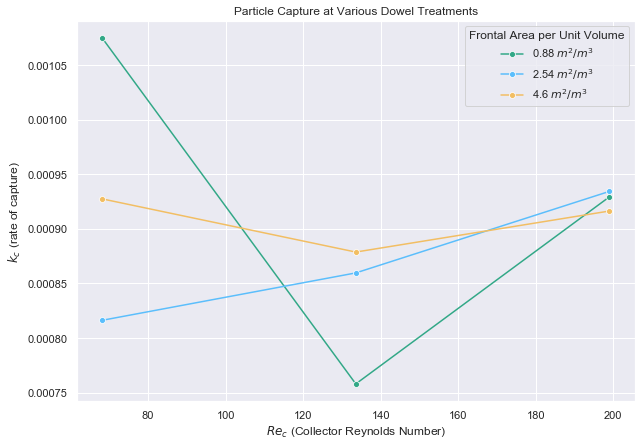

In [19]:
#particle capture vs. velocity for each dowel density
#kc_control = run_variables[(run_variables['Density']==0) & (run_variables['Biofouled']==0)].drop(0).sort_values('Velocity')
kc_low = all_experiments[(all_experiments['Frontal Area']==0.883) & (all_experiments['Biofouled']==0)].sort_values('Velocity')
kc_med = all_experiments[(all_experiments['Frontal Area']==2.540) & (all_experiments['Biofouled']==0)].sort_values('Velocity')
kc_high = all_experiments[(all_experiments['Frontal Area']==4.604) & (all_experiments['Biofouled']==0)].sort_values('Velocity')
plt.figure(8, figsize=(10,7))
sns.lineplot(kc_low['Re_c'], kc_low['k_c'], marker = 'o', color = '#32a887');
sns.lineplot(kc_med['Re_c'], kc_med['k_c'], marker = 'o', color = '#5bbefc');
sns.lineplot(kc_high['Re_c'], kc_high['k_c'], marker = 'o', color = '#f2be63');
plt.ylabel('$k_{c}$ (rate of capture)');
plt.xlabel('$Re_{c}$ (Collector Reynolds Number)');
plt.legend(['0.88 $m^{2}/m^{3}$', '2.54 $m^{2}/m^{3}$', '4.6 $m^{2}/m^{3}$'], title = 'Frontal Area per Unit Volume');
plt.title('Particle Capture at Various Dowel Treatments');

In [20]:
control = all_experiments[all_experiments['Density']==0]
ext_low = all_experiments[all_experiments['Density']==232]
low = all_experiments[(all_experiments['Density']==278) & (all_experiments['Biofouled']==0)].sort_values('Velocity')
med =  all_experiments[(all_experiments['Density']==800)  & (all_experiments['Biofouled']==0)].sort_values('Velocity')
high = all_experiments[(all_experiments['Density']==1450) & (all_experiments['Biofouled']==0)].sort_values('Velocity')

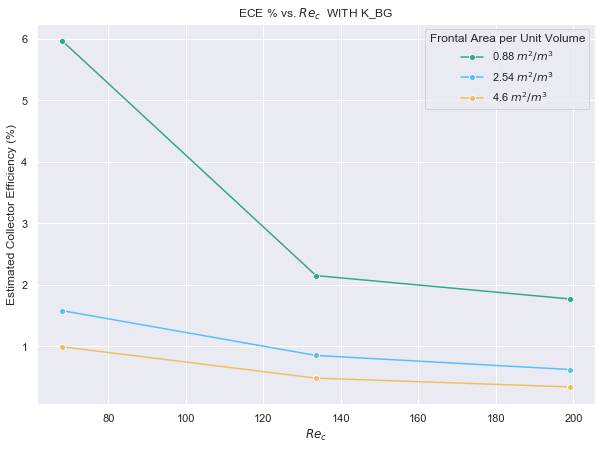

In [21]:
plt.figure(6, figsize=(10,7))
sns.lineplot(low['Re_c'], low['ECE %'], marker = 'o', color = '#32a887')
sns.lineplot(med['Re_c'], med['ECE %'], marker = 'o', color = '#5bbefc')
sns.lineplot(high['Re_c'], high['ECE %'], marker = 'o', color = '#f2be63')
plt.xlabel('$Re_{c}$')
plt.ylabel('Estimated Collector Efficiency (%)');
plt.title('ECE % vs. $Re_{c}$  WITH K_BG')
plt.legend(['0.88 $m^{2}/m^{3}$', '2.54 $m^{2}/m^{3}$', '4.6 $m^{2}/m^{3}$'], title = 'Frontal Area per Unit Volume');

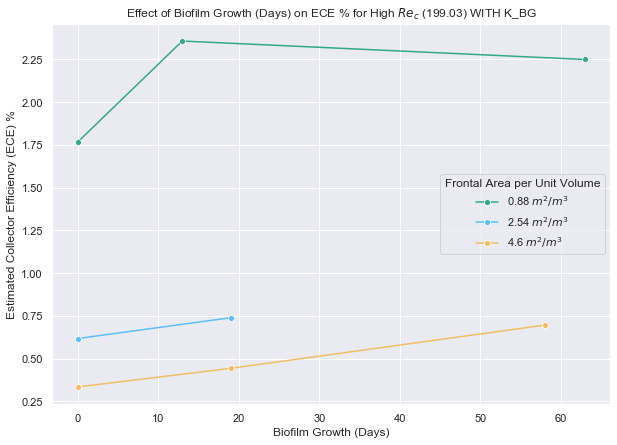

In [22]:
#collector efficinecy as a result of biofouling: high density runs
high_biofouled = all_experiments[(all_experiments['Density']==1450) & (all_experiments['Velocity']==30)]
high_biofouled['Biofilm Growth (Days)'] = [0, 19, 58]
med_biofouled = all_experiments[(all_experiments['Density']==800)  & (all_experiments['Velocity']==30)]
med_biofouled['Biofilm Growth (Days)'] = [0, 19]
low_biofouled = all_experiments[(all_experiments['Density']==278)  & (all_experiments['Velocity']==30)]
low_biofouled['Biofilm Growth (Days)'] = [0, 13, 63]
plt.figure(7, figsize=(10,7))
sns.lineplot(low_biofouled['Biofilm Growth (Days)'], low_biofouled['ECE %'], color = '#32a887', marker = 'o');
sns.lineplot(med_biofouled['Biofilm Growth (Days)'], med_biofouled['ECE %'], color = '#5bbefc', marker = 'o');
sns.lineplot(high_biofouled['Biofilm Growth (Days)'], high_biofouled['ECE %'], color = '#f2be63', marker = 'o');
plt.ylabel('Estimated Collector Efficiency (ECE) %');
plt.legend(['0.88 $m^{2}/m^{3}$', '2.54 $m^{2}/m^{3}$', '4.6 $m^{2}/m^{3}$'], title = 'Frontal Area per Unit Volume');
plt.title('Effect of Biofilm Growth (Days) on ECE % for High $Re_{c}$ (199.03) WITH K_BG');